In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19300\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the MINMAX PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_MinMaxScaler_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,priceUSD
0,0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,priceUSD
0,-3.655104,0.802061,1.817268,-1.285273,-1.640494,1.700293,-1.001414,1.101779,-0.999867,0.152710,...,0.153301,-0.027586,0.225252,0.007899,0.170539,0.097393,0.146309,0.208756,1.173401,0.0495
1,-3.614658,0.803416,1.686412,-1.009045,-1.609771,1.699671,-0.747059,1.416030,-0.615753,0.506121,...,0.261052,-0.121278,0.115798,0.108756,0.043790,0.147877,0.246103,0.141600,1.104297,0.0726
2,-3.636358,0.825494,1.710698,-1.048296,-1.626373,1.841579,-0.698989,1.496502,-0.499075,0.612378,...,0.356758,-0.111855,0.145736,-0.008782,0.276770,0.029030,0.211571,0.214689,0.931091,0.0859
3,-3.641610,0.745754,1.603314,-1.195112,-0.952689,1.644297,-0.151961,1.282045,-0.588409,0.833923,...,0.360500,0.076649,0.157377,-0.213748,0.256696,0.187187,0.140654,0.291811,0.537814,0.0783
4,-3.646880,0.760457,1.639556,-1.193579,-1.102717,1.673044,-0.434564,1.083872,-0.812450,0.726314,...,0.285444,0.095544,0.122837,-0.236417,0.286961,0.041868,0.133825,0.244540,0.446112,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,4.827080,3.872729,-0.564335,-0.964944,0.955012,-0.208703,-0.160729,0.079293,-0.353848,0.195394,...,0.004526,0.315107,-0.007492,0.132500,0.265255,0.171378,-0.052400,0.188256,0.122504,9349.0000
3484,4.874243,4.078286,-0.498325,-1.028046,0.857928,-0.213927,-0.295887,0.083715,-0.351354,0.203269,...,-0.087225,0.475346,-0.080046,-0.166548,0.307902,0.089965,0.003772,0.139277,0.202801,9394.0000
3485,4.873536,3.950721,-0.594500,-0.959722,1.011089,-0.306760,-0.063507,0.463026,-0.061280,0.456087,...,-0.133529,0.307913,-0.229377,0.031294,0.255388,-0.049842,0.003653,0.269696,0.125988,9366.0000
3486,4.822283,4.116169,-0.434845,-0.844725,0.491708,-0.136111,-0.857335,0.091674,-0.184611,0.583483,...,-0.138564,0.315845,-0.106430,0.072532,0.355768,0.043088,-0.011649,0.177111,0.143189,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the data into train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


### Feature scaling 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Simple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the test set results

In [12]:
y_pred=regressor.predict(X_test)

### Visualising the Training set results

ValueError: x and y must be the same size

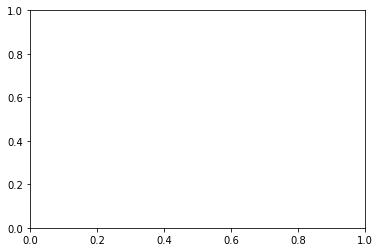

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('PriceUSD vs MINMaxScaling (Training set)')
plt.xlabel('MinMaxScaling')
plt.ylabel('PriceUSD')
plt.show()

### Visualising the Test set results

ValueError: x and y must be the same size

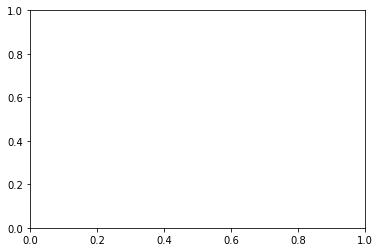

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('PriceUSD vs Transactions (Test set)')
plt.xlabel('Transactions')
plt.ylabel('PriceUSD')
plt.show()

### Checking accuracy score,precision,recalland f1-score 
### using performance metrices on multiclass classification

In [16]:
from sklearn import metrics

In [25]:
#Printing the confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

ValueError: continuous is not supported

In [28]:
# printing the precision and recall , among other metrics
print(metrics.classification_report(y_test,y_pred,digits=3))

ValueError: continuous is not supported

### Q-Q Plot for ROC curves by Gaussian transformations

In [17]:
import scipy.stats as stats
def diagnostic_plots(finaldata, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(finaldata[variable], dist="norm", plot=plt)

    plt.show()

    

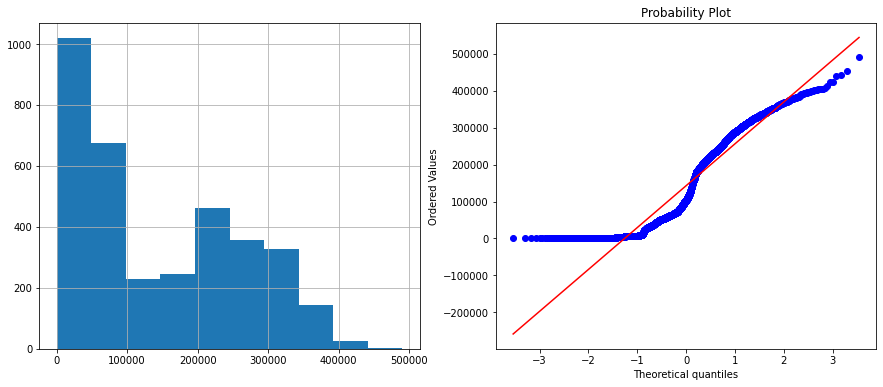

In [18]:
diagnostic_plots(df, 'transactions')

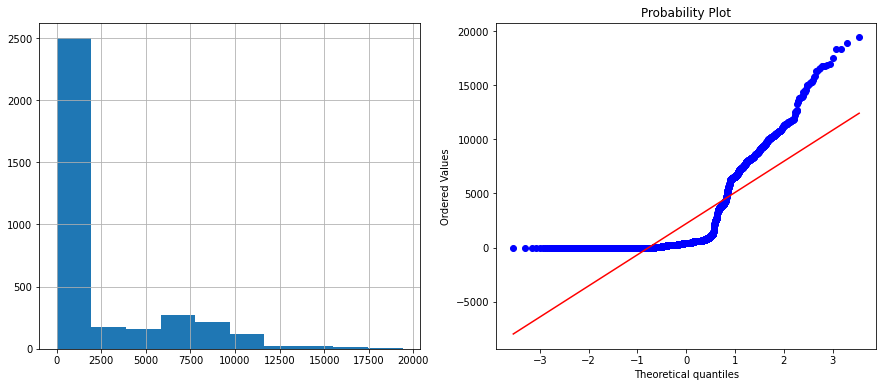

In [19]:
diagnostic_plots(df, 'priceUSD')

### Logarithmic transformations

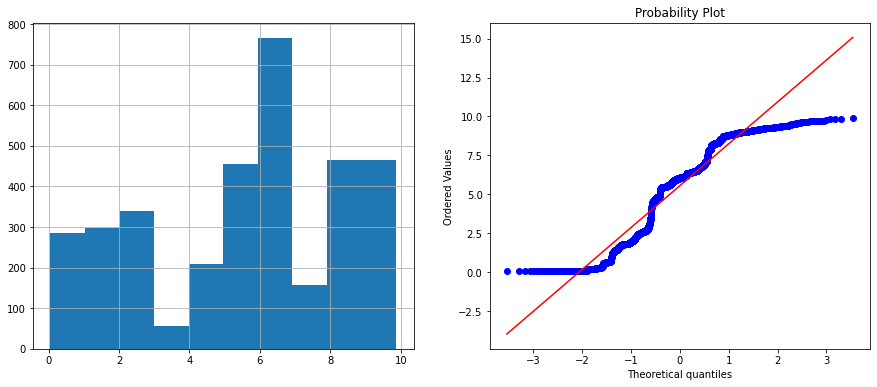

In [20]:
df['Log_priceUSD']=np.log(df['priceUSD']+1)
diagnostic_plots(df,'Log_priceUSD')

### Reciprocal transformation

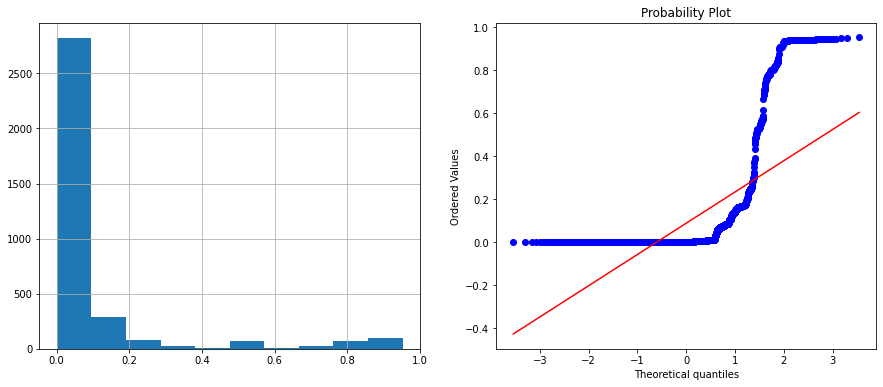

In [21]:
df['Rec_priceUSD']=1/(df['priceUSD']+1)
diagnostic_plots(df,'Rec_priceUSD')

### Square-root transformations

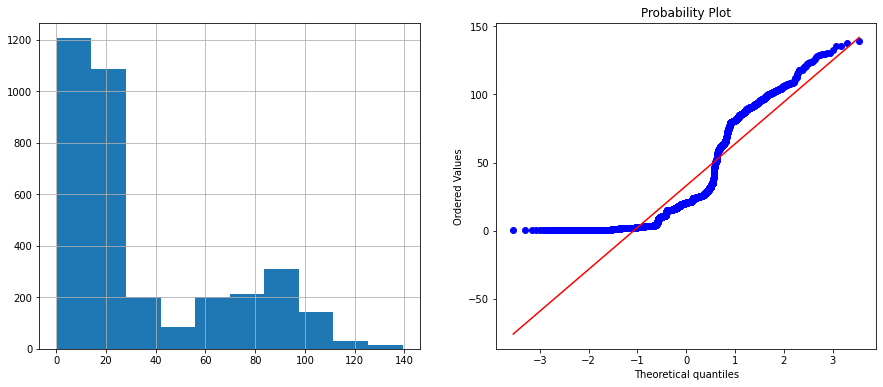

In [22]:
df['sqr_priceUSD']=df['priceUSD']**(1/2)
diagnostic_plots(df,'sqr_priceUSD')

### Exponential transformation

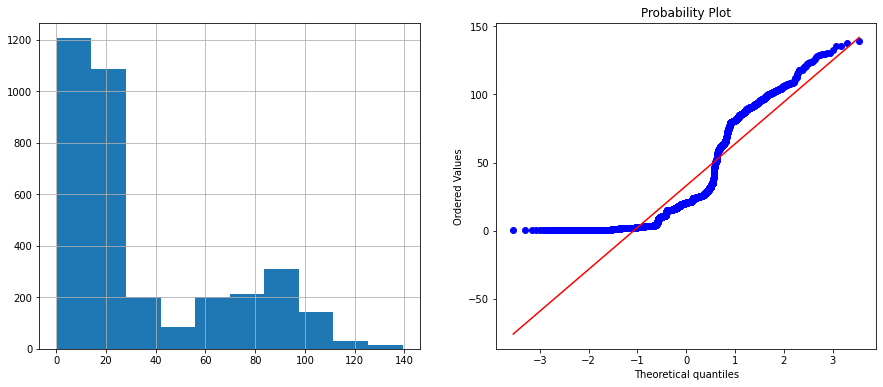

In [23]:
df['Exp_priceUSD']=df['priceUSD']**(1/5)

diagnostic_plots(df,'sqr_priceUSD')

### BoxCox

Optimal lambda:  0.09233362442495512


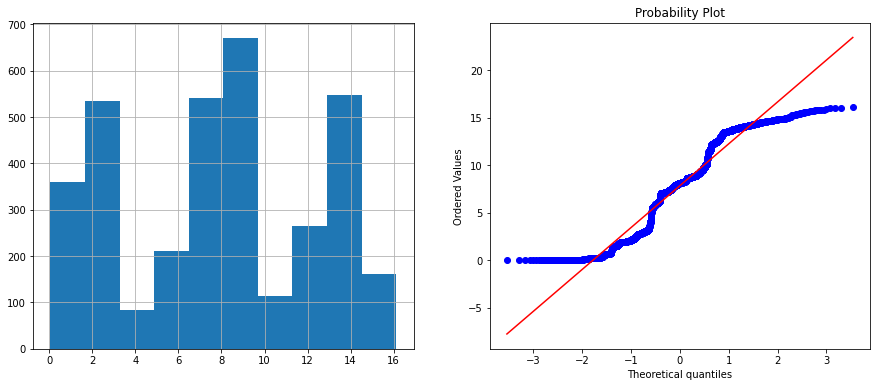

In [24]:
df['priceUSD_boxcox'], param = stats.boxcox(df.priceUSD+1) # we can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'priceUSD_boxcox')